# Surbhi Mayank

## TASK 3 - Exploratory Data Analysis - Retail

### AIM : As a business manager, try to find out the weak areas where you can work to make more profit.

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the data
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Data Inspection

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
# checking the duplicates
df.duplicated().sum()

17

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
# no. of observations
df.shape

(9977, 13)

In [11]:
# drop the unnecessary columns like ship mode which doesn't affect the sales and profit
df.drop(columns="Postal Code",axis=1,inplace=True)
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [12]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
corr = df.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


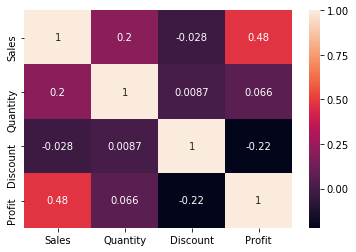

In [14]:
# Visualizing through heatmap discount and profit to check the collinearity between sales, quantity, discount and profit
sns.heatmap(corr, annot=True)

## Exploratory Data Analysis

In [16]:
# state group wise, view numerical data as mean value
df.state = df.groupby("State")[["Quantity", "Discount", "Sales", "Profit"]].mean()
df.state

,Quantity,Discount,Sales,Profit
State,,,,
Alabama,4.196721,0.000000,319.846557,94.865989
Arizona,3.848214,0.303571,157.508933,-15.303235
Arkansas,4.000000,0.000000,194.635500,66.811452
California,3.832164,0.072946,229.246629,38.241878
Colorado,3.807692,0.316484,176.418231,-35.867351
Connecticut,3.426829,0.007317,163.223866,42.823071
Delaware,3.822917,0.006250,285.948635,103.930988
District of Columbia,4.000000,0.000000,286.502000,105.958930
Florida,3.600522,0.299347,233.612815,-8.875461


In [17]:
# state group wise, view numerical data as minimum value
df.state = df.groupby("State")[["Quantity", "Discount", "Sales", "Profit"]].min()
df.state

,Quantity,Discount,Sales,Profit
State,,,,
Alabama,1,0.0,3.620,0.0000
Arizona,1,0.2,1.408,-814.4832
Arkansas,1,0.0,4.300,1.4190
California,1,0.0,0.990,-325.5720
Colorado,1,0.2,1.080,-3399.9800
Connecticut,1,0.0,3.520,-15.5826
Delaware,1,0.0,3.380,-48.7839
District of Columbia,2,0.0,9.640,4.4344
Florida,1,0.2,1.167,-1811.0784


In [18]:
# state group wise, view numerical data as maximum value
df.state = df.groupby("State")[["Quantity", "Discount", "Sales", "Profit"]].max()
df.state

,Quantity,Discount,Sales,Profit
State,,,,
Alabama,14,0.0,3040.000,1459.2000
Arizona,14,0.7,1879.960,211.4955
Arkansas,9,0.0,1793.980,843.1706
California,14,0.2,8187.650,1906.4850
Colorado,13,0.7,2549.985,247.9960
Connecticut,11,0.3,1133.350,294.6710
Delaware,9,0.3,10499.970,5039.9856
District of Columbia,8,0.0,1379.920,648.5624
Florida,13,0.7,22638.480,327.5922


In [19]:
sales_profit = df.groupby("State")["Profit"].sum()
sales_profit

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76330.7891
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12601.6500
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24428.0903
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

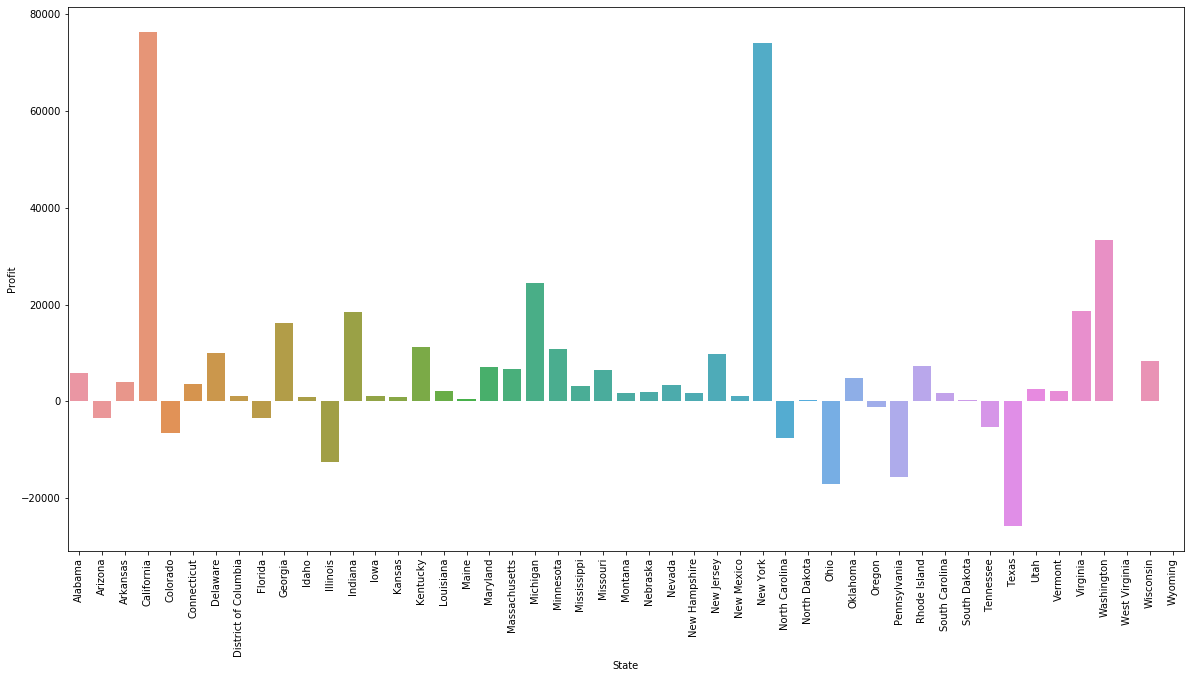

In [20]:
plt.figure(figsize = (20,10))
sns.barplot(x=sales_profit.index, y=sales_profit.values)
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

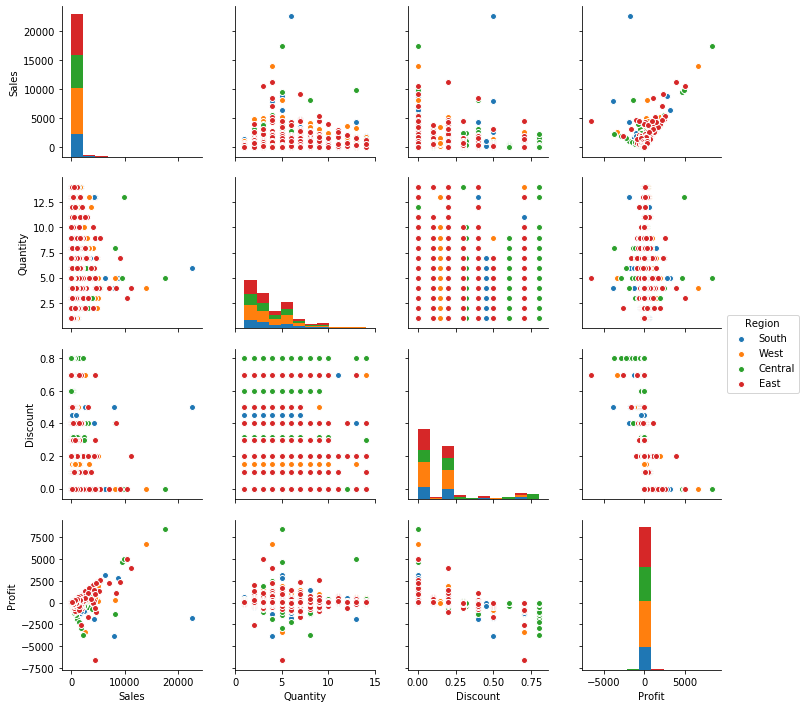

In [22]:
sns.pairplot(df, hue="Region", diag_kind="hist")

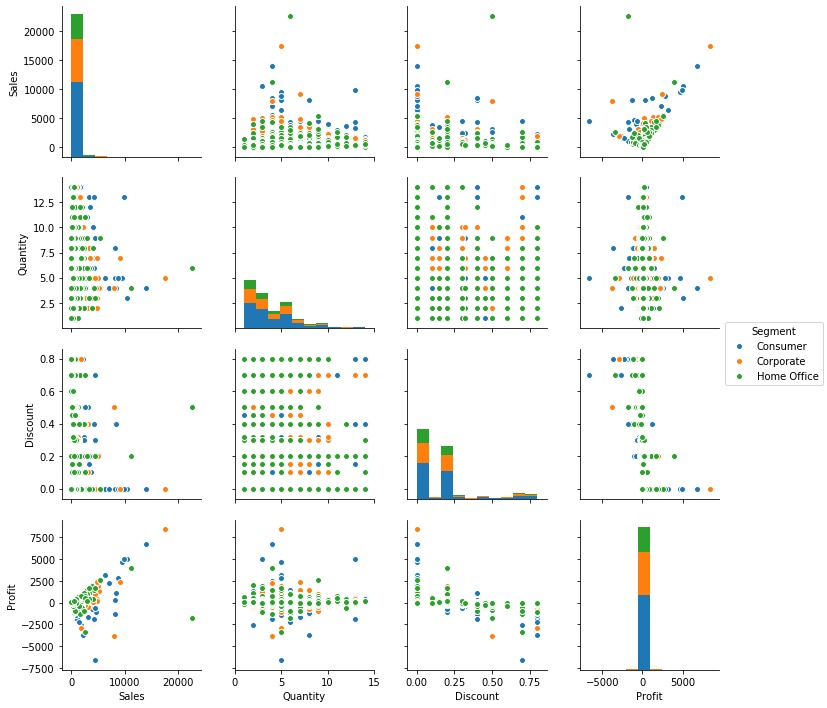

In [23]:
sns.pairplot(df, hue="Segment", diag_kind="hist")

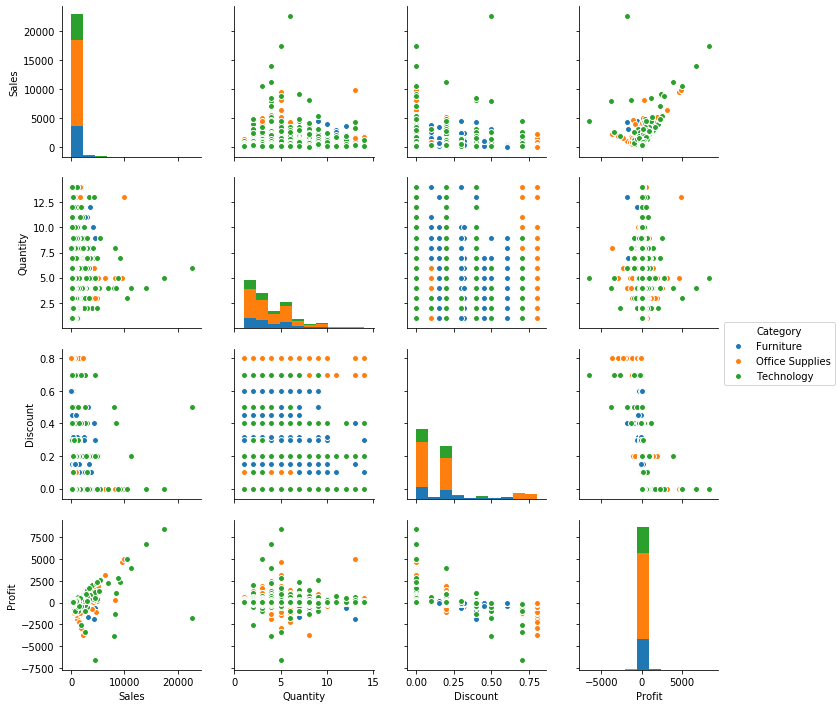

In [24]:
sns.pairplot(df, hue="Category", diag_kind="hist")

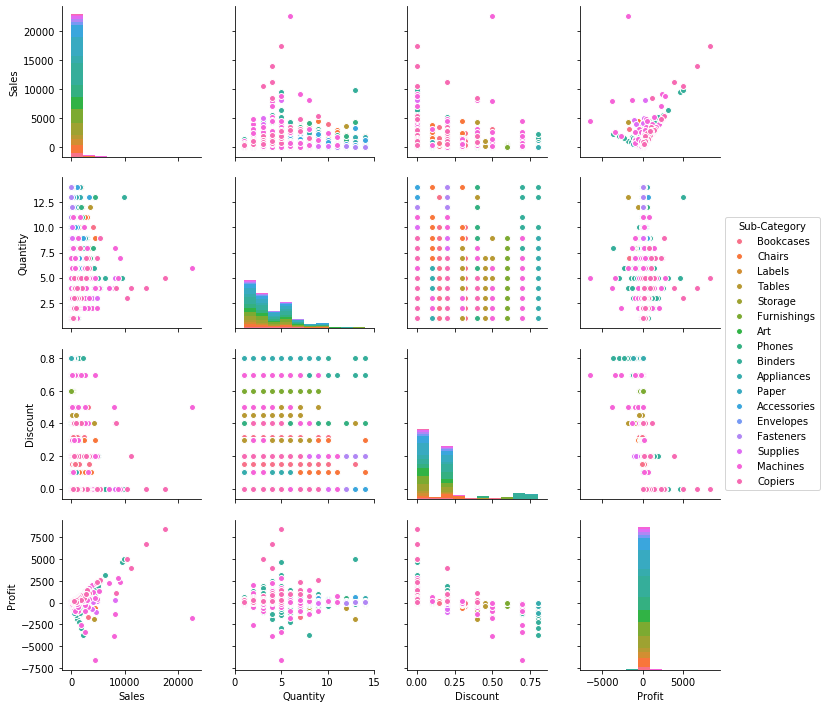

In [25]:
sns.pairplot(df, hue="Sub-Category", diag_kind="hist")

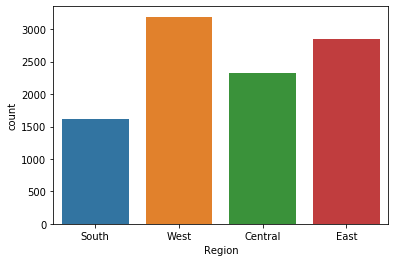

In [26]:
sns.countplot("Region", data=df)

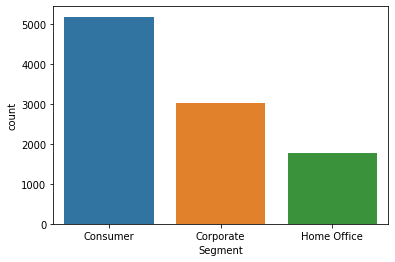

In [27]:
sns.countplot("Segment", data=df)

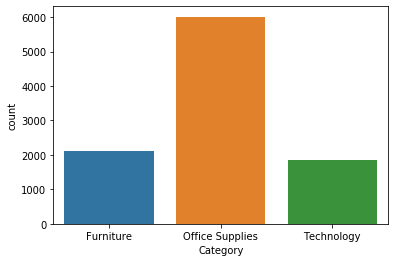

In [28]:
sns.countplot("Category", data=df)

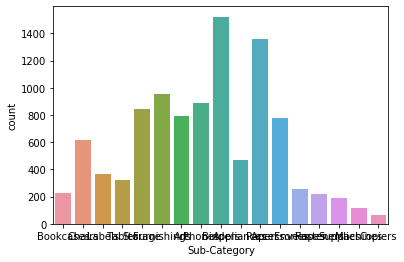

In [29]:
sns.countplot("Sub-Category", data=df)

## Sales by states

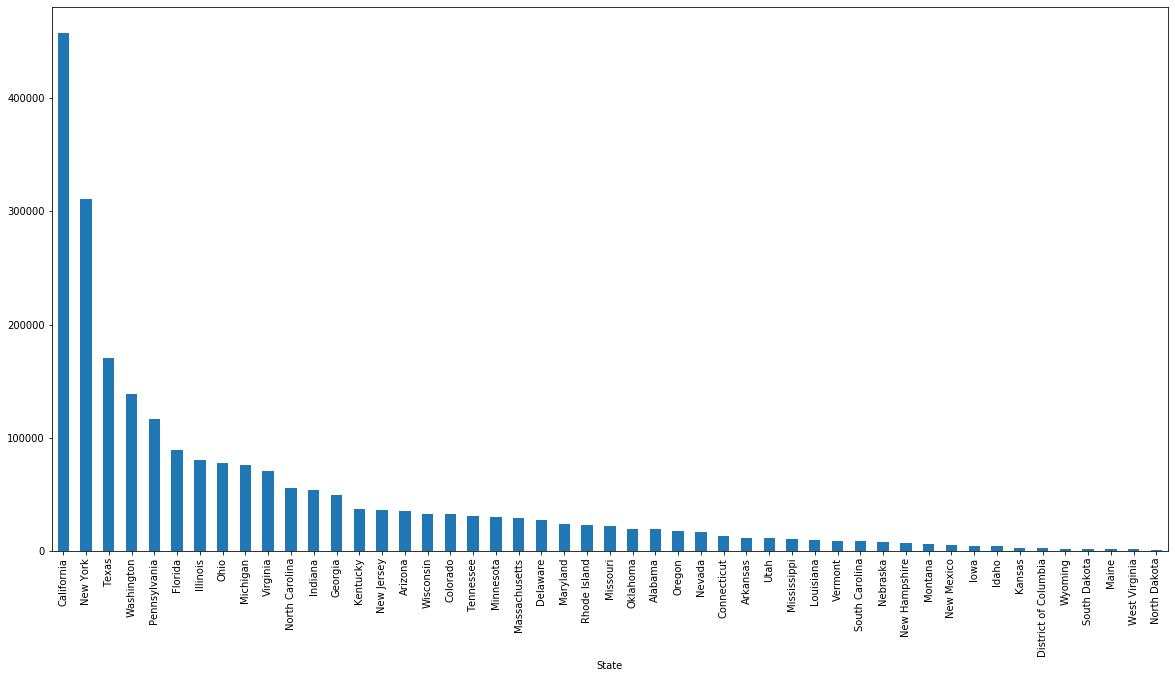

In [30]:
sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False)
sales.plot.bar(figsize=(20,10))

## Sales Profit per Category

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


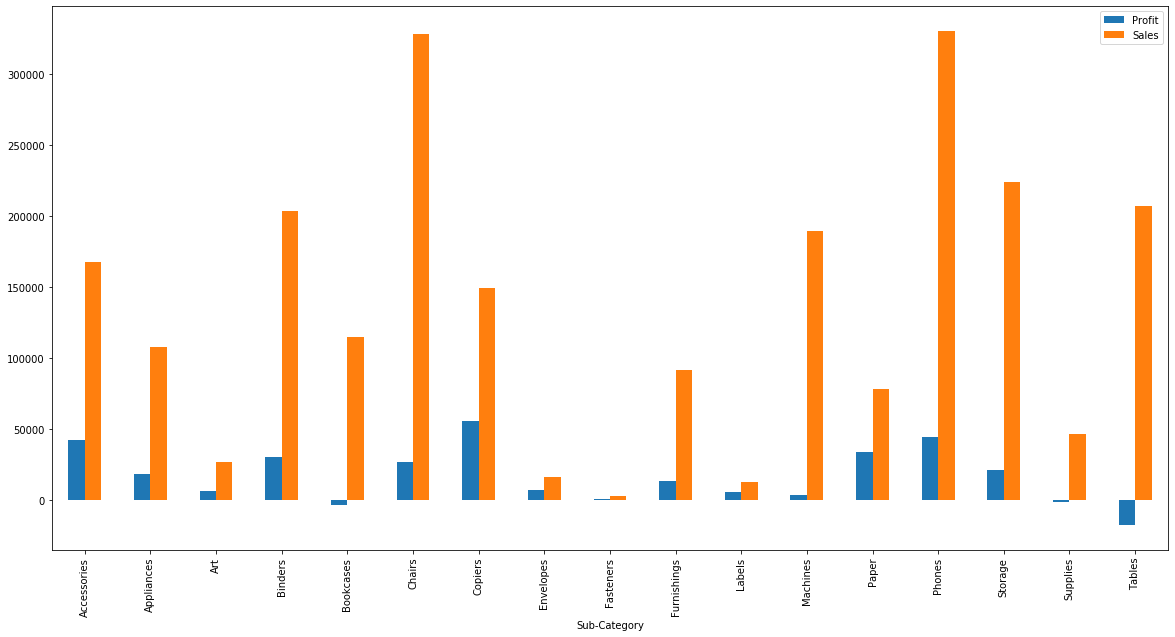

In [31]:
category = df.groupby("Sub-Category")["Profit", "Sales"].sum()
category.plot.bar(figsize=(20,10))

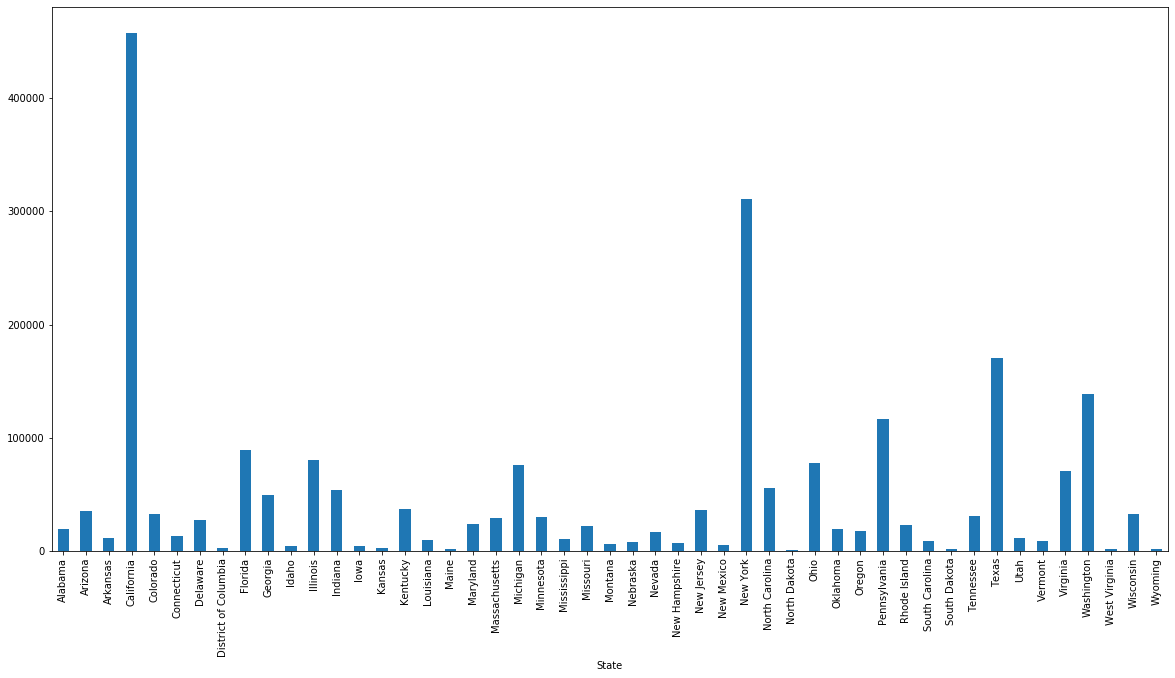

In [32]:
# sales of top 10 states
states = df.groupby("State")["Sales"].sum()
states.plot.bar(figsize=(20,10))

## Profit by States

In [33]:
df.groupby("State").Profit.agg(["sum", "mean", "min", "max", "median", "count", "std", "var"])

,sum,mean,min,max,median,count,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,16.87500,61,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,2.53365,224,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,18.34080,60,123.249880,15190.532873
California,76330.7891,38.241878,-325.5720,1906.4850,13.33380,1996,97.803399,9565.504848
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,3.12480,182,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,12.18310,82,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,19.19700,96,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,14.52720,10,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,2.93400,383,126.324165,15957.794770


[]

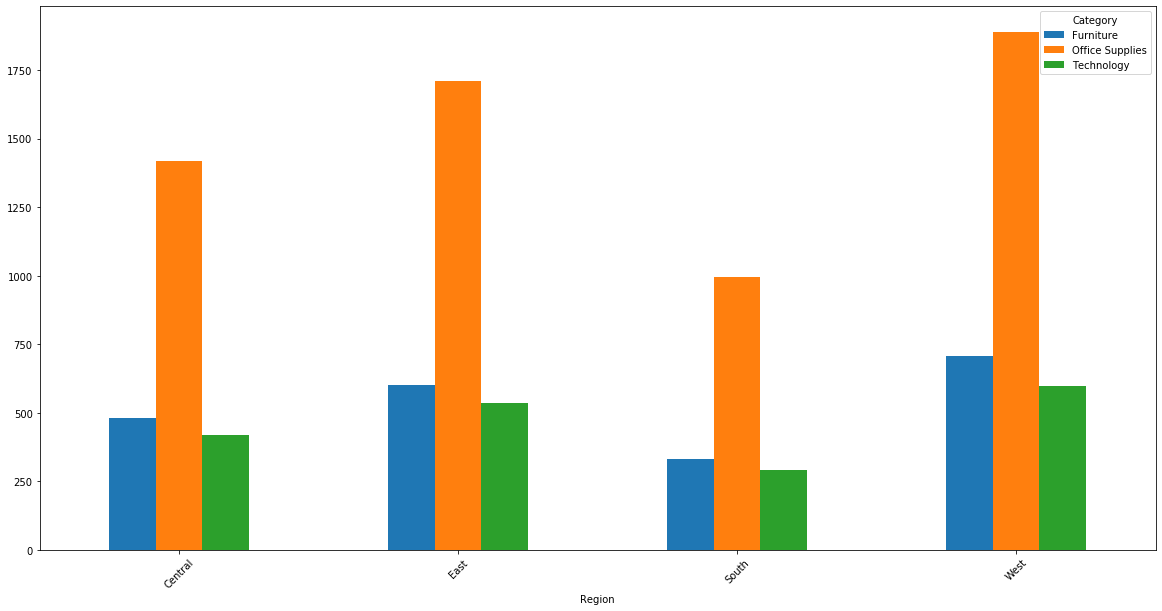

In [34]:
# Category VS Region
pd.crosstab(df["Region"], df["Category"]).plot(kind="bar", figsize=(20,10))
plt.xticks(rotation=45)
plt.plot()

[]

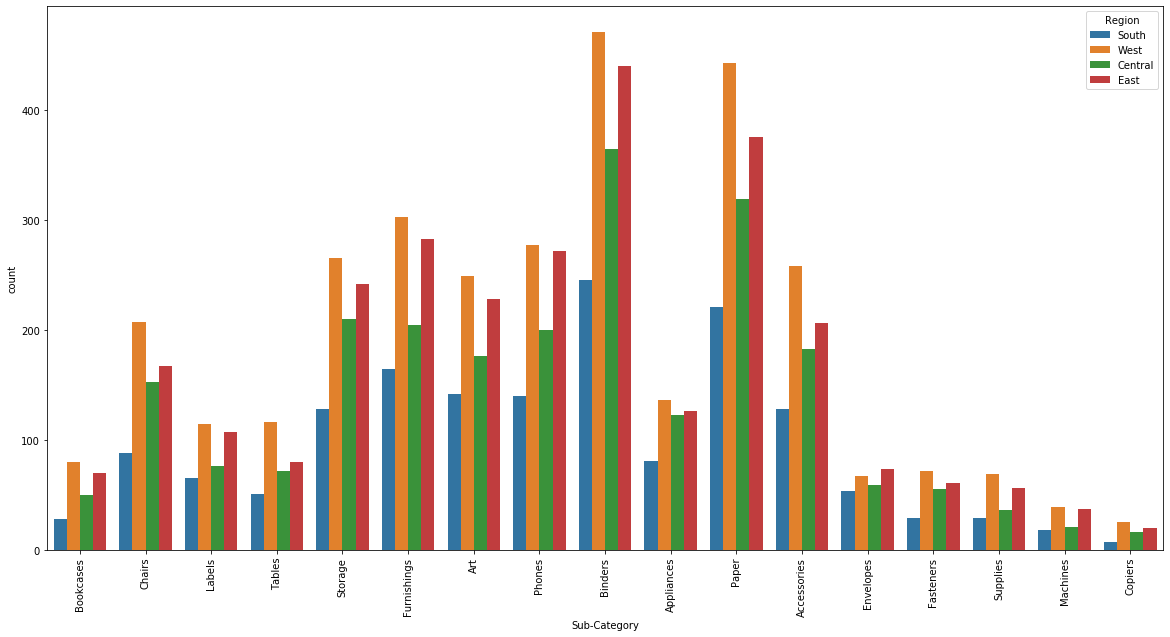

In [35]:
# Sub-Category VS Region
plt.figure(figsize=(20,10))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.xticks(rotation="vertical")
plt.plot()

CONCLUSIONS:
1. Many sales need improvements in terms of category and sub-category, they should be sell at reasonable price.
2. Profits and sales are highly correlated.
3. There is no correlation between quantity and profit.
4. give extra effort in segment part of the dataset, couldn't get correlation.